In [51]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
with open('../tracker_stubs/ball_detection.pkl','rb') as f:
    ball_positions= pickle.load(f)

In [53]:
ball_positions = [x.get(1,[]) for x in ball_positions]
df_ball_positions = pd.DataFrame(ball_positions,columns=['x1','y1','x2','y2'])

df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()

In [54]:
df_ball_positions['mid_y']= (df_ball_positions['y1'] + df_ball_positions['y2'])/2
df_ball_positions['mid_rolling_mean']= df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()

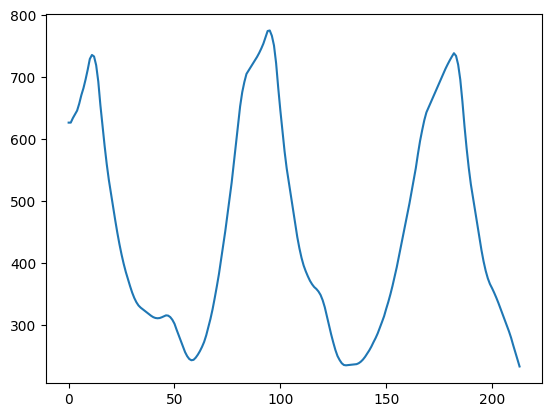

In [55]:
plt.plot(df_ball_positions['mid_rolling_mean'])

In [56]:
df_ball_positions['delta_y']= df_ball_positions['mid_rolling_mean'].diff()

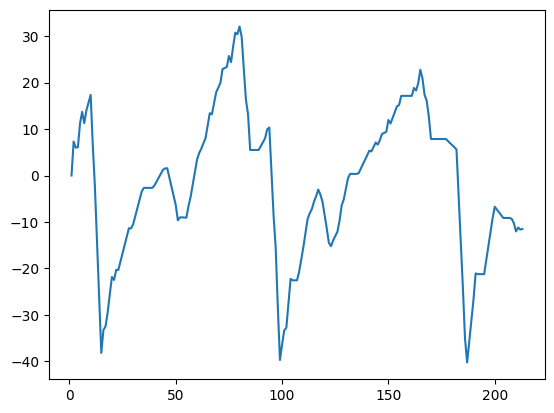

In [57]:
plt.plot(df_ball_positions['delta_y'])

In [58]:
df_ball_positions['ball_hit']=0

In [59]:
minimum_change_frames_for_hit = 25
for i in range(1,len(df_ball_positions)- int(minimum_change_frames_for_hit*1.2) ):
    negative_position_change = df_ball_positions['delta_y'].iloc[i] >0 and df_ball_positions['delta_y'].iloc[i+1] <0
    positive_position_change = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[i+1] >0

    if negative_position_change or positive_position_change:
        change_count = 0 
        for change_frame in range(i+1, i+int(minimum_change_frames_for_hit*1.2)+1):
            negative_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] >0 and df_ball_positions['delta_y'].iloc[change_frame] <0
            positive_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[change_frame] >0

            if negative_position_change and negative_position_change_following_frame:
                change_count+=1
            elif positive_position_change and positive_position_change_following_frame:
                change_count+=1
    
        if change_count>minimum_change_frames_for_hit-1:
            df_ball_positions['ball_hit'].iloc[i] = 1

frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit']==1].index.tolist()

C:\Users\manik\AppData\Local\Temp\ipykernel_47400\3752280353.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_positions['ball_hit'].iloc[i] = 1
C:\Users\manik\AppData\Local\Temp\ipykernel_47400\3752280353.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_positions['ball_hit'].iloc[i] = 1
C:\Users\manik\AppData\Local\Temp\ipykernel_47400\3752280353.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_posit

In [60]:
df_ball_positions[df_ball_positions['ball_hit']==1]

,x1,y1,x2,y2,mid_y,mid_rolling_mean,delta_y,ball_hit
11,776.864319,717.329590,796.807983,738.396973,727.863281,735.919061,6.523694,1
58,925.880493,240.968683,939.041455,253.989850,247.479266,243.405360,-1.957855,1
95,624.775177,748.890198,642.158569,766.700195,757.795197,775.403656,0.871686,1
131,716.963379,229.094772,729.240112,242.786148,235.940460,235.241386,-0.557138,1
182,1294.889282,739.126282,1314.161499,760.566833,749.846558,738.733154,5.603119,1
